In [1]:
import tensorflow as tf
import numpy as np
import cPickle
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

import dataset_class as dataset

In [2]:
# Parameters
learning_rate = 0.001
training_iters = 100000
batch_size = 1
display_step = 10

logs_path = "/tmp/tensorflow/log"    

# Network Parameters
n_input = 1 
n_steps = 1 
n_hidden = 1 

In [3]:
data = pd.read_csv("./data/international-airline-passengers.csv")

In [4]:
# Helper functions
def weight_variable(shape, varName):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial, name=varName)

def bias_variable(shape, varName):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial, name=varName)

In [5]:
# tf Graph input
with tf.name_scope("input"):
    _x = tf.placeholder("float", [1 , 1], name="x-input")
    _y = tf.placeholder("float", [1, 1], name="y-input")

with tf.name_scope("fc"):
    W = tf.Variable(tf.random_normal([1, 1]), name="weight")
    b = tf.Variable(tf.random_normal([1]), name="bias")

def RNN(x, weights, biases):
    x = tf.split(0, 1, x)
    # Define a lstm cell with tensorflow
    with tf.name_scope("rnn"):
        lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(1)
        stacked_lstm = tf.nn.rnn_cell.MultiRNNCell([lstm_cell] * 5)

    # Get lstm cell output
    outputs, states = tf.contrib.rnn.rnn.rnn(stacked_lstm, x, dtype=tf.float32)

    # Linear activation, using rnn inner loop last output
    return tf.matmul(outputs[-1], weights) + biases

In [6]:
pred = RNN(_x, W, b)

# Define loss and optimizer
with tf.name_scope("cost"):
    cost = tf.sqrt((tf.square(tf.sub(_y, pred))))
    
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model

#accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
with tf.name_scope("accuracy"):
    accuracy = tf.sub(_y, pred)
    
tf.scalar_summary("cost", cost)
tf.scalar_summary("accuracy", accuracy)
summary_op = tf.merge_all_summaries()

Step:  0  Prediction:  [[ 112.49752808]]  loss: [[ 0.24753419]]
Step:  10  Prediction:  [[ 104.48591614]]  loss: [[ 0.23611449]]
Step:  20  Prediction:  [[ 158.47454834]]  loss: [[ 0.22519613]]
Step:  30  Prediction:  [[ 199.46299744]]  loss: [[ 0.21436663]]
Step:  40  Prediction:  [[ 183.45124817]]  loss: [[ 0.20362491]]
Step:  50  Prediction:  [[ 236.4392395]]  loss: [[ 0.19293134]]
Step:  60  Prediction:  [[ 204.42695618]]  loss: [[ 0.18229158]]
Step:  70  Prediction:  [[ 203.41436768]]  loss: [[ 0.17170057]]
Step:  80  Prediction:  [[ 312.40142822]]  loss: [[ 0.16114462]]
Step:  90  Prediction:  [[ 413.38809204]]  loss: [[ 0.15061543]]
Optimization Finished!
pred: [[ 355.37573242]]  truth: 355
pred: [[ 422.37573242]]  truth: 422
pred: [[ 465.37573242]]  truth: 465
pred: [[ 467.37573242]]  truth: 467
pred: [[ 404.37573242]]  truth: 404
pred: [[ 347.37573242]]  truth: 347
pred: [[ 305.37573242]]  truth: 305
pred: [[ 336.37573242]]  truth: 336
pred: [[ 340.37573242]]  truth: 340
pred:

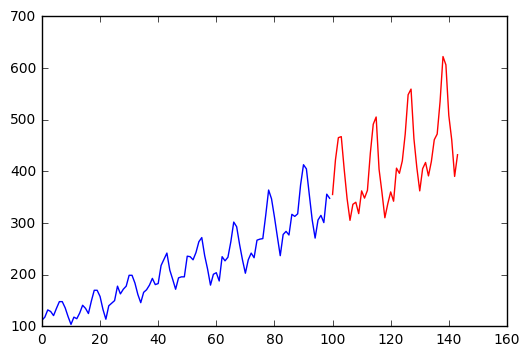

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    train_writer = tf.train.SummaryWriter(logs_path + "/train", sess.graph)
    test_writer = tf.train.SummaryWriter(logs_path + "/test")
    
    xPointsComplete = np.zeros(144)
    
    step = 0
    # Keep training until reach max iterations
    while step < 100:
        xPointsComplete[step] = step
        #x = data["passengers"][step]
        x = np.array([[step]])
        
        y = data["passengers"][step]
        y = np.array([[y]])
        
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={_x: x, _y: y})
        
        if step % display_step == 0:
            # Calculate batch accuracy
            p = sess.run(accuracy, feed_dict={_x: x, _y: y})
            loss = (p - y) ** 2
            # Calculate batch loss
            #loss = sess.run(cost, feed_dict={_x: x, _y: y})
            print "Step: ", step, " Prediction: ", p, " loss:", loss
            
        step += 1
    print "Optimization Finished!"
    
    predY = np.zeros((44))
    xPoints = np.zeros((44))
    
    testLoss = 0
    
    while step < 144:          
        x = np.array([[step]])
        xPoints[step - 100] = step
        xPointsComplete[step] = step
        
        y = data["passengers"][step]
        y = np.array([[y]])
        
        
        
        p = sess.run(accuracy, feed_dict={_x: x, _y: y})
        predY[step - 100] = p
        testLoss +=  (p - y) ** 2
        
        
        print "pred:", p, " truth:", data["passengers"][step]
        step += 1
        
    print "averag test loss:", testLoss / 44
    
    
    
    plt.plot(xPoints, predY, color="red")
    #plt.plot(xPoints, data["passengers"][100:], color="blue")
    plt.plot(xPointsComplete[:100], data["passengers"][:100], color="blue")
    
    train_writer.close()
    test_writer.close()


In [8]:
data

,Month,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119
